In [1]:
import pandas as pd
import numpy as np

%run functions_continuous.ipynb

# Download data

In [2]:

symbol = "BTCUSDT"
temporalidad="15m"
initial_year=2022
end_year = 2025
month=7
day=1

symbols = ["ADA", "ATOM", "AVAX", "BNB", "BTC", "DOGE", "DOT", "ETH", "LINK", "LTC", "MATIC", "NEAR", "SHIB", "SOL", "TON", "UNI", "XRP"]


"""
for symbol in ["AVAX", "TRX", "DOT", "MATIC", "LINK", "UNI", "LTC", "SHIB", "ATOM", "NEAR"]:
    download_data_from_binance(f"{symbol}USDT", temporalidad, initial_year, end_year)"""

'\nfor symbol in ["AVAX", "TRX", "DOT", "MATIC", "LINK", "UNI", "LTC", "SHIB", "ATOM", "NEAR"]:\n    download_data_from_binance(f"{symbol}USDT", temporalidad, initial_year, end_year)'

### Estandarizar data

In [3]:
df = parse_binance_files(f"../../data/spot/daily/klines/{symbol}/{temporalidad}") #, temporalidad)


## Matrices de trancisión

### Matriz de segundo orden con tendencia

In [4]:
# Segundo orden con tendencia
transition_matrix, transition_counts, df_valid = order_n_matrix(df, 
                                                    order=3,
                                                    time_filter=None,
                                                    use_tendency=True)

Matriz de transición (probabilidades):
                       dw      up  binom_p
pattern  tendency                         
dw_dw_dw -1        0.4242  0.5758   0.0000
          1        0.4538  0.5462   0.0000
dw_dw_up -1        0.4735  0.5265   0.0000
          1        0.5185  0.4815   0.0049
dw_up_dw -1        0.4695  0.5305   0.0000
          1        0.5103  0.4897   0.1325
dw_up_up -1        0.5057  0.4943   0.4438
          1        0.5471  0.4529   0.0000
up_dw_dw -1        0.4483  0.5517   0.0000
          1        0.5010  0.4990   0.8984
up_dw_up -1        0.4770  0.5230   0.0011
          1        0.5237  0.4763   0.0000
up_up_dw -1        0.4686  0.5314   0.0000
          1        0.5204  0.4796   0.0002
up_up_up -1        0.5314  0.4686   0.0067
          1        0.5656  0.4344   0.0000

Matriz de transición (ocurrencias):
type                 dw    up
pattern  tendency            
dw_dw_dw -1        3845  5220
          1         944  1136
dw_dw_up -1        3691  4104


In [ ]:
iterate_over_patterns(df, relevant_transition_matrix)

In [71]:
symbols + "USDT"

TypeError: can only concatenate list (not "str") to list

In [73]:
import json
from concurrent.futures import ThreadPoolExecutor, as_completed

%run functions_continuous.ipynb

def process_symbol(symbol, temporalidad):
    df = parse_binance_files(f"../../data/spot/daily/klines/{symbol}/{temporalidad}")
    transition_matrix, transition_counts, df_valid = order_n_matrix(
        df, order=3, time_filter=None, use_tendency=True, vis=False
    )
    output = iterate_over_patterns(
        df, transition_matrix, max_adverse_move=None, minimum_range_movement=None, vis=False
    )
    rows = [{"pattern": o[0], "tendency": o[1], "direction": o[2]} for o in output]
    return symbol, rows

# define symbols y temporalidad antes si no existen
symbols = ["ADAUSDT", "ATOMUSDT", "AVAXUSDT", "BNBUSDT", "BTCUSDT", "DOGEUSDT", "DOTUSDT", "ETHUSDT", "LINKUSDT", "LTCUSDT", "MATICUSDT", "NEARUSDT", "SHIBUSDT", "SOLUSDT", "TONUSDT", "UNIUSDT", "XRPUSDT"]
# temporalidad = "1h"

patterns_per_symbol = {}
with ThreadPoolExecutor(max_workers=min(8, len(symbols))) as ex:
    futures = {ex.submit(process_symbol, s, temporalidad): s for s in symbols}
    for fut in as_completed(futures):
        sym, rows = fut.result()
        patterns_per_symbol[sym] = rows
        print(sym)

json_result = json.dumps(patterns_per_symbol, indent=4, ensure_ascii=False)
print(json_result)

with open("patterns_per_symbol.json", "w", encoding="utf-8") as f:
    f.write(json_result)


Pendiente negativa, o mucho tiempo debajo en dw_dw_up & -1
Pendiente negativa, o mucho tiempo debajo en dw_dw_up & 1
Pendiente negativa, o mucho tiempo debajo en dw_dw_dw & -1
Pendiente negativa, o mucho tiempo debajo en dw_dw_dw & -1
Pendiente negativa, o mucho tiempo debajo en dw_dw_dw & -1
Pendiente negativa, o mucho tiempo debajo en dw_up_dw & 1
Pendiente negativa, o mucho tiempo debajo en dw_dw_dw & 1
Pendiente negativa, o mucho tiempo debajo en dw_dw_dw & 1
Pendiente negativa, o mucho tiempo debajo en dw_dw_dw & 1
Pendiente negativa, o mucho tiempo debajo en dw_dw_dw & 1
Pendiente negativa, o mucho tiempo debajo en dw_dw_up & -1
Pendiente negativa, o mucho tiempo debajo en dw_dw_up & -1
Pendiente negativa, o mucho tiempo debajo en dw_dw_up & -1
Pendiente negativa, o mucho tiempo debajo en dw_dw_up & -1
Pendiente negativa, o mucho tiempo debajo en dw_dw_up & -1
Pendiente negativa, o mucho tiempo debajo en dw_dw_up & -1
Pendiente negativa, o mucho tiempo debajo en dw_up_dw & -1
Pen

In [70]:
print(output)

[['dw_dw_dw', -1, 'up', None, None,         index          entry_time  entry_price  exit_price     pnl  capital  \
0          26 2022-01-01 06:45:00       1.3190      1.3170 -0.0020  -0.0020   
1          48 2022-01-01 12:15:00       1.3260      1.3250 -0.0010  -0.0030   
2          69 2022-01-01 17:30:00       1.3370      1.3460  0.0090   0.0060   
3         102 2022-01-02 01:45:00       1.3600      1.3520 -0.0080  -0.0020   
4         103 2022-01-02 02:00:00       1.3520      1.3570  0.0050   0.0030   
...       ...                 ...          ...         ...     ...      ...   
13329  124623 2025-07-22 05:15:00       0.8700      0.8704  0.0004   0.9081   
13330  124636 2025-07-22 08:30:00       0.8548      0.8618  0.0070   0.9151   
13331  124637 2025-07-22 08:45:00       0.8618      0.8652  0.0034   0.9185   
13332  124672 2025-07-22 17:30:00       0.8782      0.8860  0.0078   0.9263   
13333  124683 2025-07-22 20:15:00       0.8850      0.8877  0.0027   0.9290   

       capital_

In [61]:
print(output[0][0])
print(output[0][1])

dw_dw_dw
-1


Operaciones totales: 8343
Promedio por día: 7.66
Capital final: 21608.88


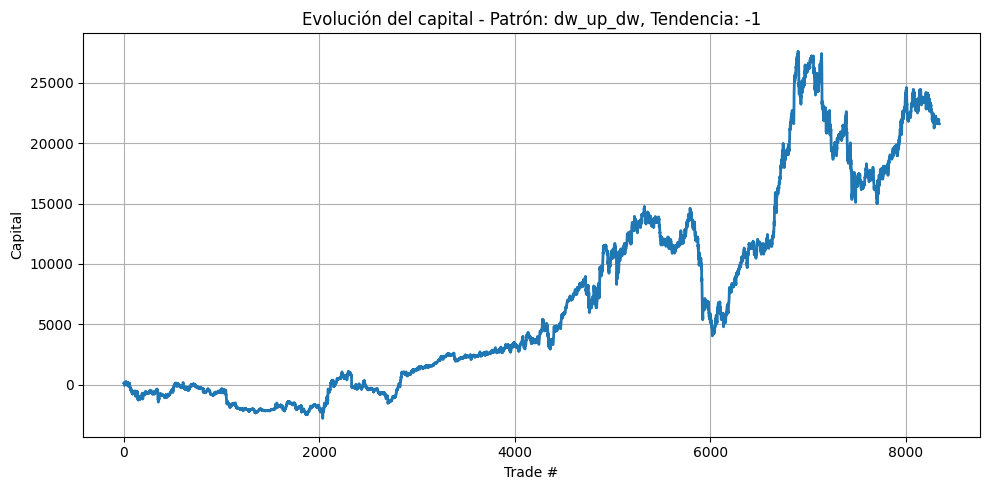

In [6]:
pattern = "dw_up_dw" 
tendency = -1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 8622
Promedio por día: 7.90
Capital final: 18630.61


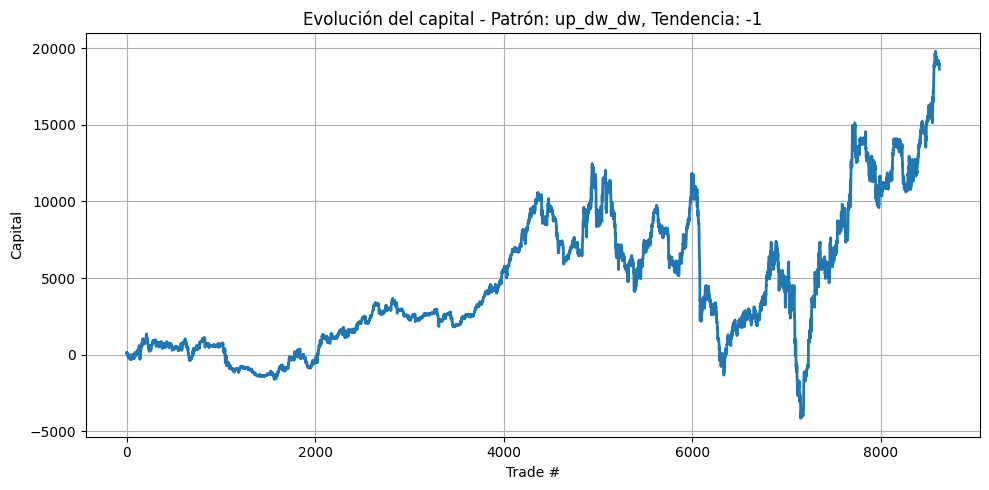

In [7]:
pattern = "up_dw_dw" 
tendency = -1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 5455
Promedio por día: 5.07
Capital final: 1544.31


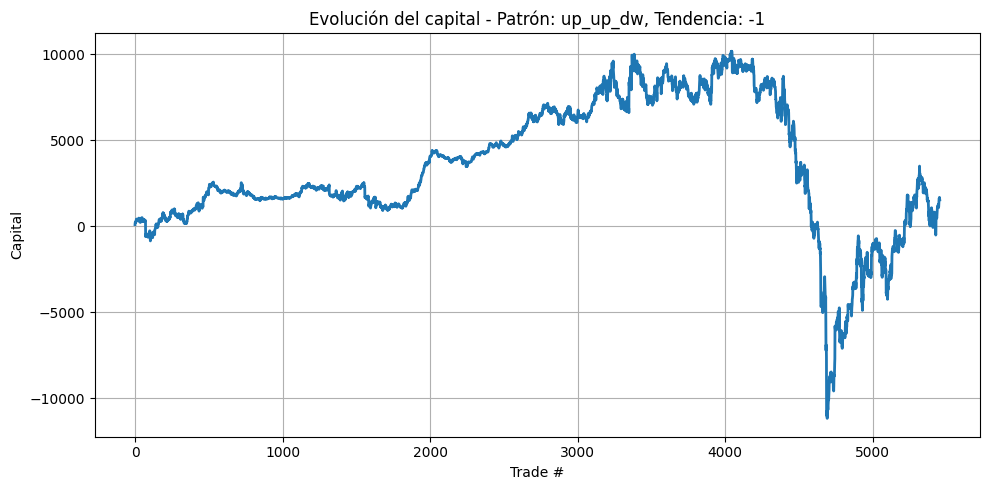

In [8]:
pattern = "up_up_dw" 
tendency = -1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 2080
Promedio por día: 2.49
Capital final: 14943.75


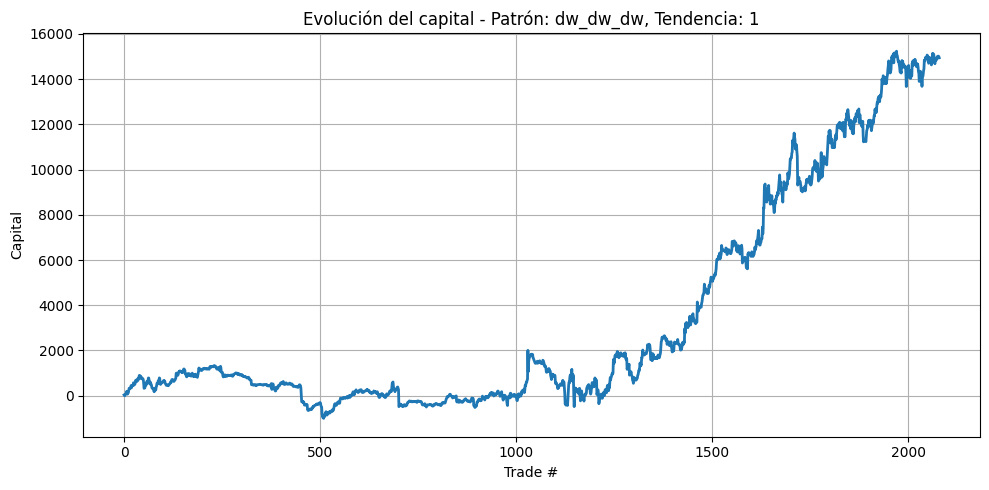

In [9]:
pattern = "dw_dw_dw" 
tendency = 1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 9605
Promedio por día: 8.80
Capital final: 25910.63


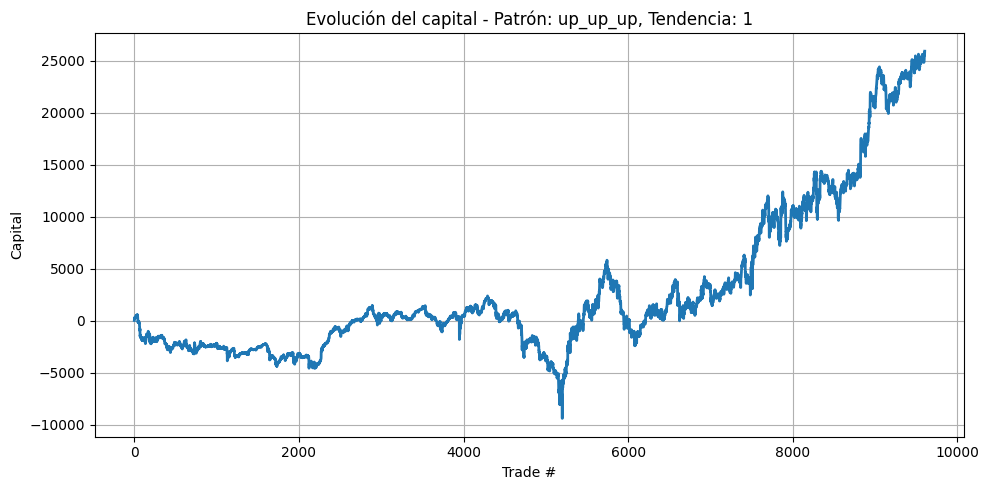

In [10]:
pattern = "up_up_up" 
tendency = 1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

In [43]:

symbol = "BTCUSDT"
temporalidad="15m"
initial_year=2022
end_year = 2025
month=7
day=1

symbols = ["ADA", "ATOM", "AVAX", "BNB", "BTC", "DOGE", "DOT", "ETH", "LINK", "LTC", "MATIC", "NEAR", "SHIB", "SOL", "TON", "UNI", "XRP"]

symbol = symbols[0]
df = parse_binance_files(f"../../data/spot/daily/klines/{symbol}USDT/{temporalidad}") #, temporalidad)

# Segundo orden con tendencia
transition_matrix, transition_counts, df_valid = order_n_matrix(df, 
                                                    order=3,
                                                    time_filter=None,
                                                    use_tendency=True)


Matriz de transición (probabilidades):
                       dw      up  binom_p
pattern  tendency                         
dw_dw_dw -1        0.4752  0.5248   0.0000
          1        0.5177  0.4823   0.0574
dw_dw_up -1        0.4941  0.5059   0.2499
          1        0.5299  0.4701   0.0000
dw_up_dw -1        0.4987  0.5013   0.8098
          1        0.5425  0.4575   0.0000
dw_up_up -1        0.5360  0.4640   0.0000
          1        0.5587  0.4413   0.0000
up_dw_dw -1        0.4945  0.5055   0.2620
          1        0.5258  0.4742   0.0001
up_dw_up -1        0.4912  0.5088   0.1968
          1        0.5409  0.4591   0.0000
up_up_dw -1        0.5079  0.4921   0.2219
          1        0.5398  0.4602   0.0000
up_up_up -1        0.5263  0.4737   0.0165
          1        0.5609  0.4391   0.0000

Matriz de transición (ocurrencias):
type                 dw    up
pattern  tendency            
dw_dw_dw -1        6336  6998
          1        1521  1417
dw_dw_up -1        4765  4879


Operaciones totales: 5164
Promedio por día: 4.12
Capital final: 100.22


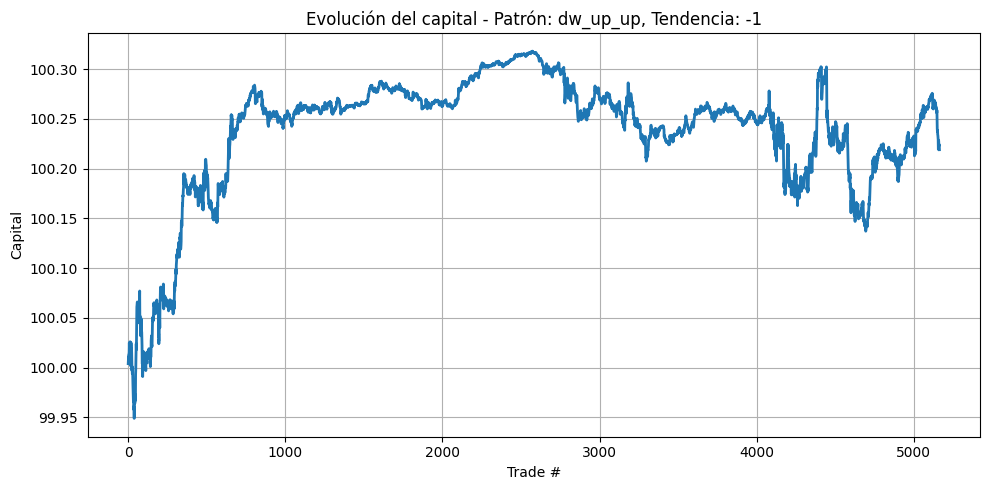

In [45]:

pattern = "dw_up_up" 
tendency = -1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 2107
Promedio por día: 2.34
Capital final: 100.37


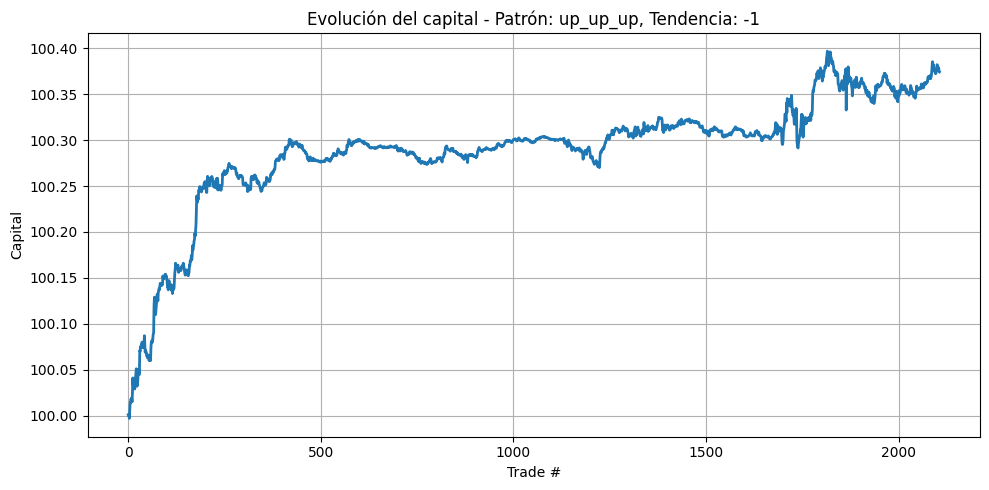

In [5]:

pattern = "up_up_up" 
tendency = -1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 6996
Promedio por día: 5.45
Capital final: 100.53


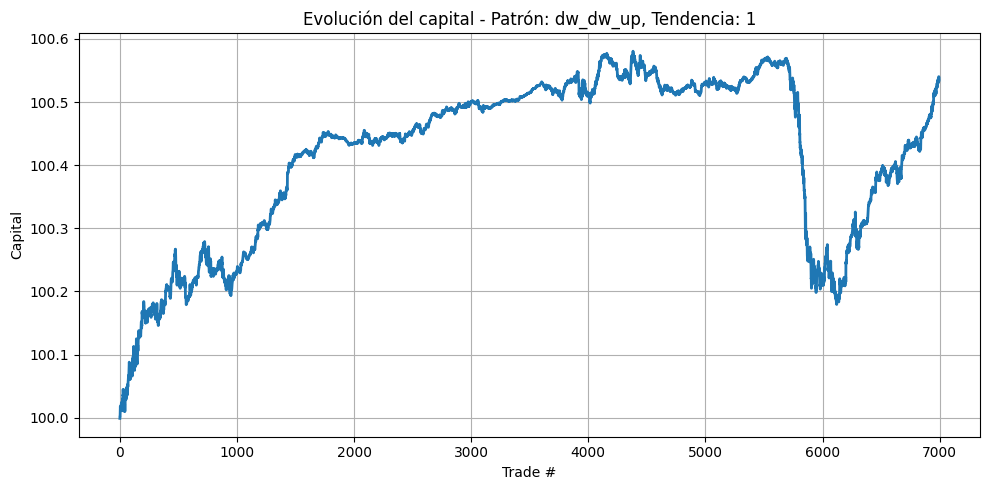

In [6]:

pattern = "dw_dw_up" 
tendency = 1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 9278
Promedio por día: 7.16
Capital final: 99.89


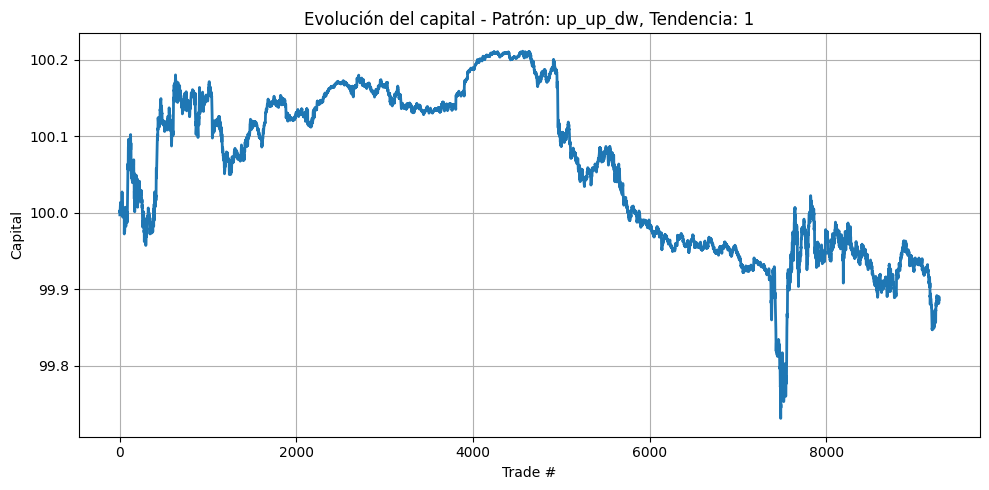

In [7]:

pattern = "up_up_dw" 
tendency = 1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 9743
Promedio por día: 7.56
Capital final: 100.50


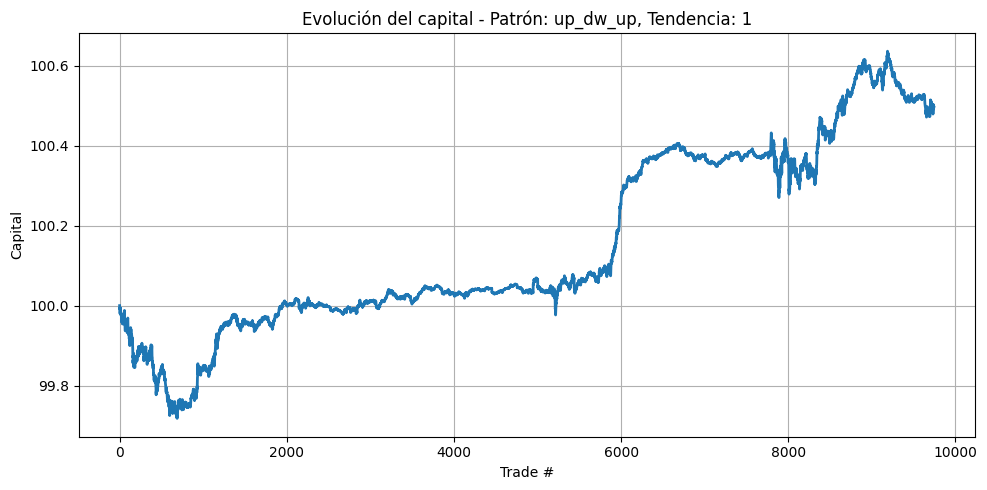

In [8]:

pattern = "up_dw_up" 
tendency = 1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 10393
Promedio por día: 8.07
Capital final: 100.56


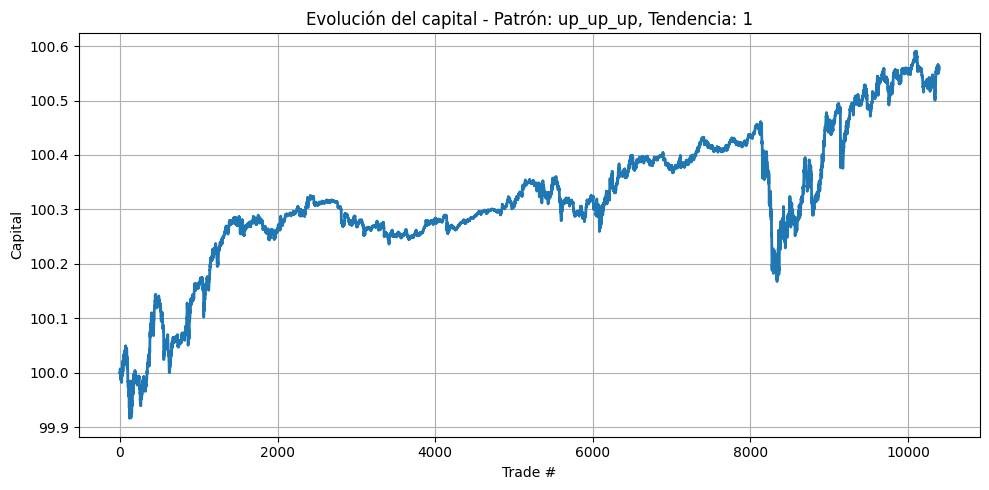

In [9]:

pattern = "up_up_up" 
tendency = 1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 10291
Promedio por día: 7.93
Capital final: 100.77


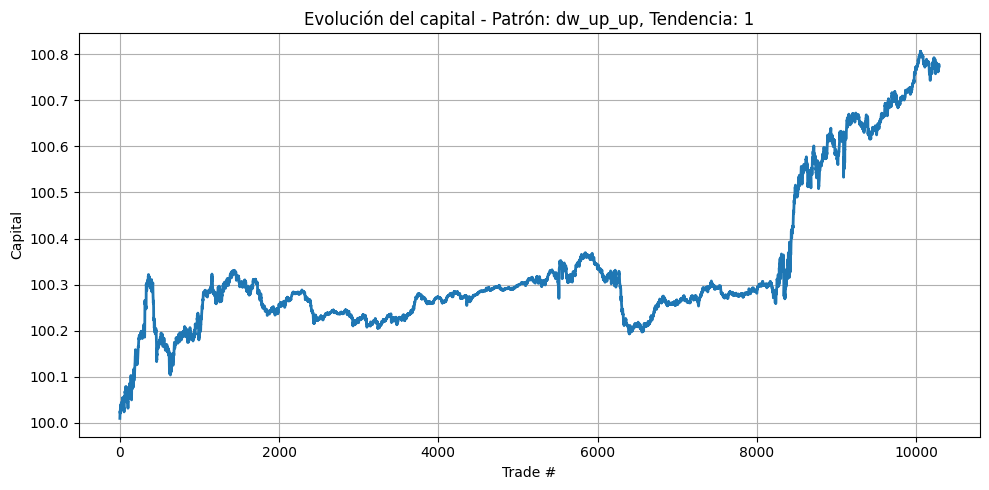

In [10]:

pattern = "dw_up_up" 
tendency = 1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

In [15]:

symbol = "BTCUSDT"
temporalidad="15m"
initial_year=2022
end_year = 2025
month=7
day=1

symbols = ["ADA", "ATOM", "AVAX", "BNB", "BTC", "DOGE", "DOT", "ETH", "LINK", "LTC", "MATIC", "NEAR", "SHIB", "SOL", "TON", "UNI", "XRP"]

symbol = symbols[1]
df = parse_binance_files(f"../../data/spot/daily/klines/{symbol}USDT/{temporalidad}") #, temporalidad)

# Segundo orden con tendencia
transition_matrix, transition_counts, df_valid = order_n_matrix(df, 
                                                    order=3,
                                                    time_filter=None,
                                                    use_tendency=True)


Matriz de transición (probabilidades):
                       dw      up  binom_p
pattern  tendency                         
dw_dw_dw -1        0.4716  0.5284   0.0000
          1        0.4959  0.5041   0.6918
dw_dw_up -1        0.4901  0.5099   0.0531
          1        0.5138  0.4862   0.0253
dw_up_dw -1        0.5010  0.4990   0.8569
          1        0.5244  0.4756   0.0001
dw_up_up -1        0.5122  0.4878   0.0796
          1        0.5365  0.4635   0.0000
up_dw_dw -1        0.4841  0.5159   0.0011
          1        0.5195  0.4805   0.0036
up_dw_up -1        0.4890  0.5110   0.1021
          1        0.5248  0.4752   0.0000
up_up_dw -1        0.5004  0.4996   0.9596
          1        0.5249  0.4751   0.0000
up_up_up -1        0.5065  0.4935   0.5533
          1        0.5390  0.4610   0.0000

Matriz de transición (ocurrencias):
type                 dw    up
pattern  tendency            
dw_dw_dw -1        6068  6798
          1        1262  1283
dw_dw_up -1        4731  4922


Operaciones totales: 12866
Promedio por día: 9.92
Capital final: 108.57


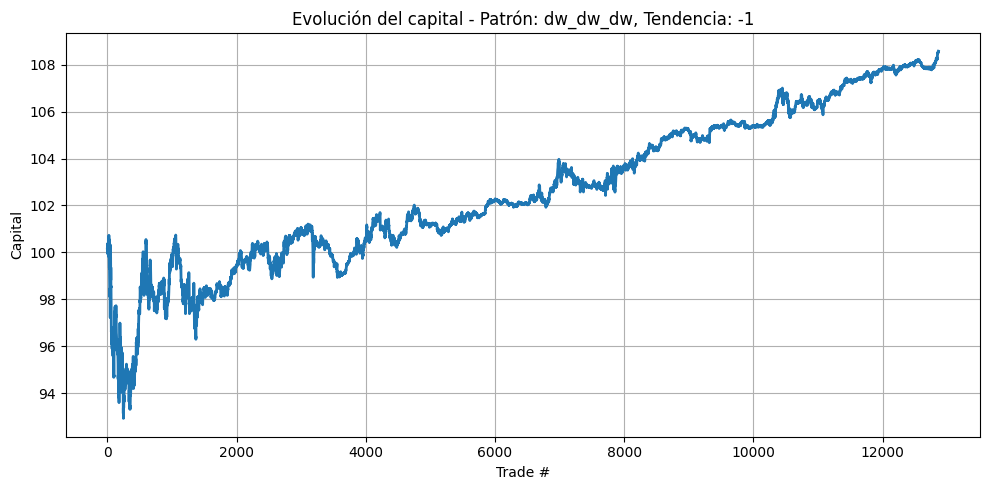

In [16]:

pattern = "dw_dw_dw" 
tendency = -1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 10453
Promedio por día: 8.07
Capital final: 119.61


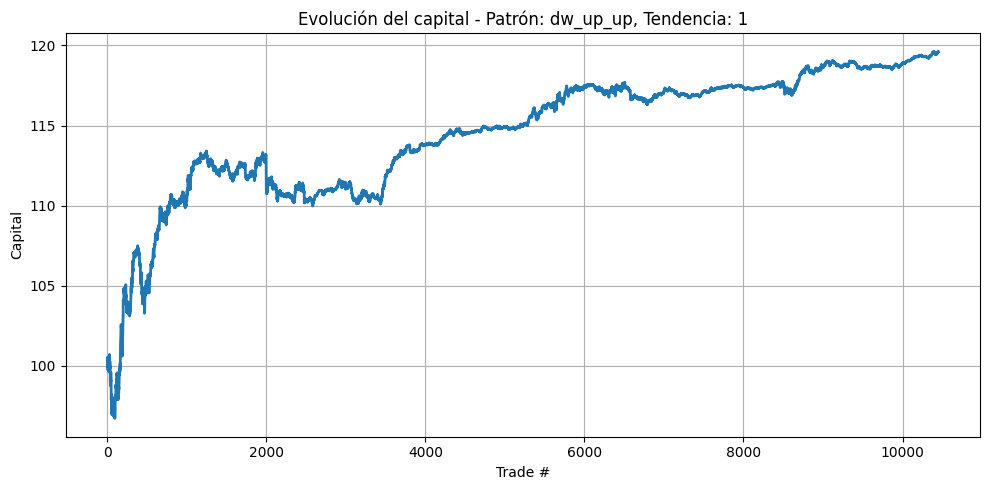

In [17]:

pattern = "dw_up_up" 
tendency = 1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 11643
Promedio por día: 9.03
Capital final: 116.64


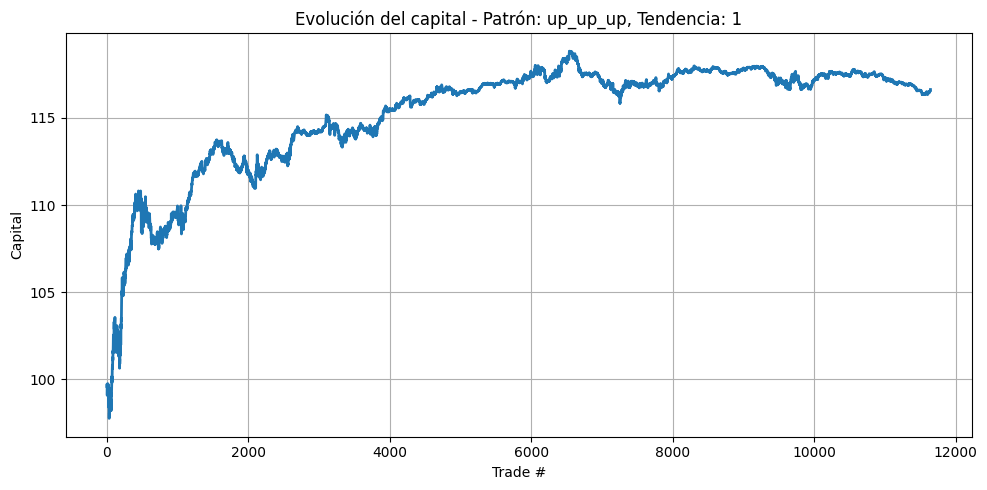

In [18]:

pattern = "up_up_up" 
tendency = 1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 9914
Promedio por día: 7.65
Capital final: 106.33


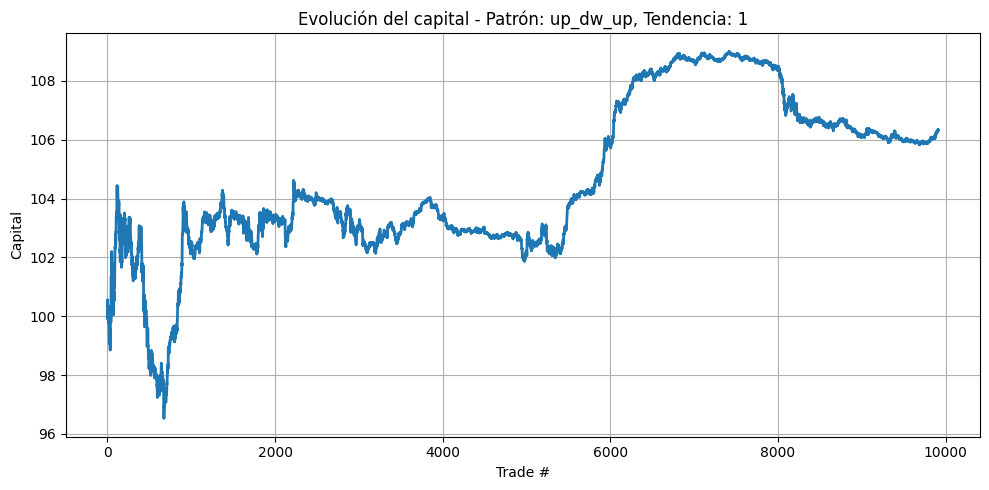

In [19]:

pattern = "up_dw_up" 
tendency = 1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

In [21]:

symbol = "BTCUSDT"
temporalidad="15m"
initial_year=2022
end_year = 2025
month=7
day=1

symbols = ["ADA", "ATOM", "AVAX", "BNB", "BTC", "DOGE", "DOT", "ETH", "LINK", "LTC", "MATIC", "NEAR", "SHIB", "SOL", "TON", "UNI", "XRP"]

symbol = symbols[2]
df = parse_binance_files(f"../../data/spot/daily/klines/{symbol}USDT/{temporalidad}") #, temporalidad)

# Segundo orden con tendencia
transition_matrix, transition_counts, df_valid = order_n_matrix(df, 
                                                    order=3,
                                                    time_filter=None,
                                                    use_tendency=True)


Matriz de transición (probabilidades):
                       dw      up  binom_p
pattern  tendency                         
dw_dw_dw -1        0.4894  0.5106   0.0120
          1        0.5178  0.4822   0.0466
dw_dw_up -1        0.5189  0.4811   0.0002
          1        0.5435  0.4565   0.0000
dw_up_dw -1        0.5173  0.4827   0.0005
          1        0.5394  0.4606   0.0000
dw_up_up -1        0.5351  0.4649   0.0000
          1        0.5621  0.4379   0.0000
up_dw_dw -1        0.5026  0.4974   0.5918
          1        0.5392  0.4608   0.0000
up_dw_up -1        0.5146  0.4854   0.0329
          1        0.5397  0.4603   0.0000
up_up_dw -1        0.5271  0.4729   0.0000
          1        0.5507  0.4493   0.0000
up_up_up -1        0.5546  0.4454   0.0000
          1        0.5687  0.4313   0.0000

Matriz de transición (ocurrencias):
type                 dw    up
pattern  tendency            
dw_dw_dw -1        6929  7229
          1        1640  1527
dw_dw_up -1        5093  4722


Operaciones totales: 7165
Promedio por día: 5.58
Capital final: 143.55


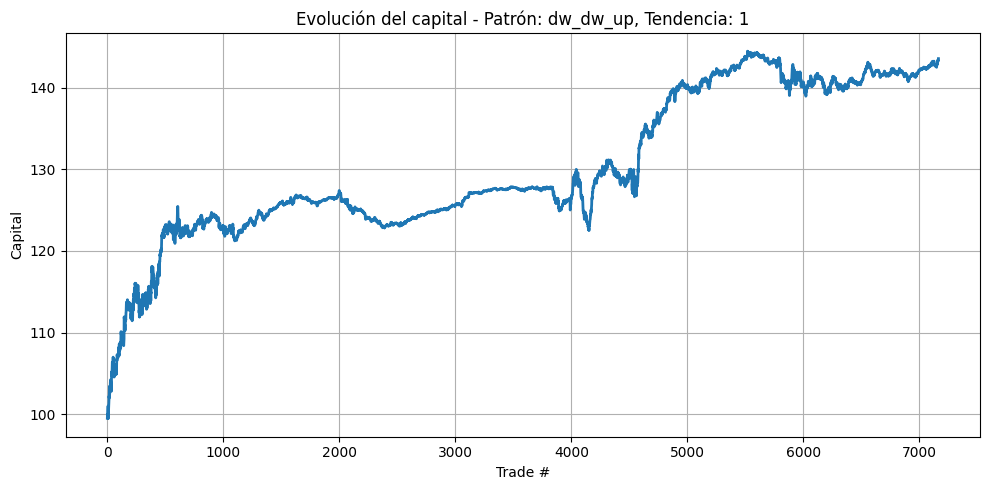

In [22]:

pattern = "dw_dw_up" 
tendency = 1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 9074
Promedio por día: 7.00
Capital final: 71.02


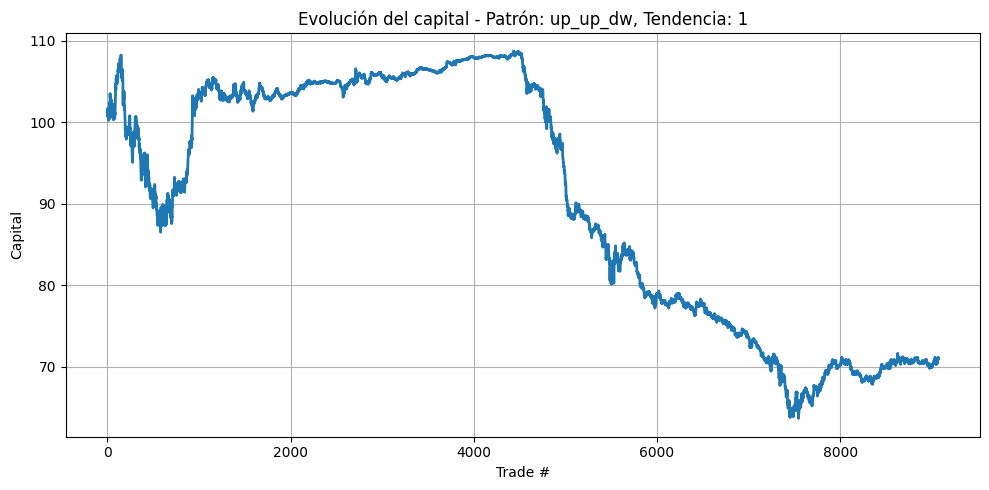

In [23]:

pattern = "up_up_dw" 
tendency = 1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 9926
Promedio por día: 7.72
Capital final: 131.87


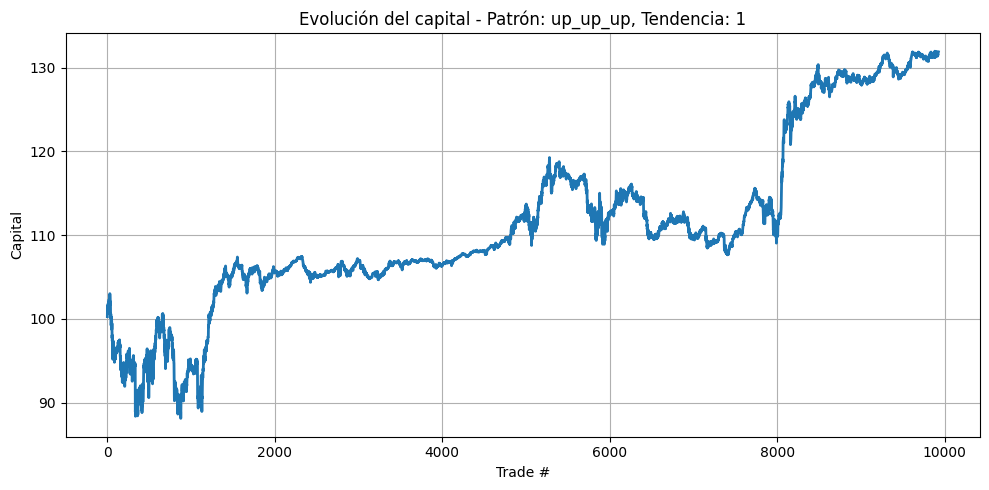

In [24]:

pattern = "up_up_up" 
tendency = 1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 9978
Promedio por día: 7.69
Capital final: 140.43


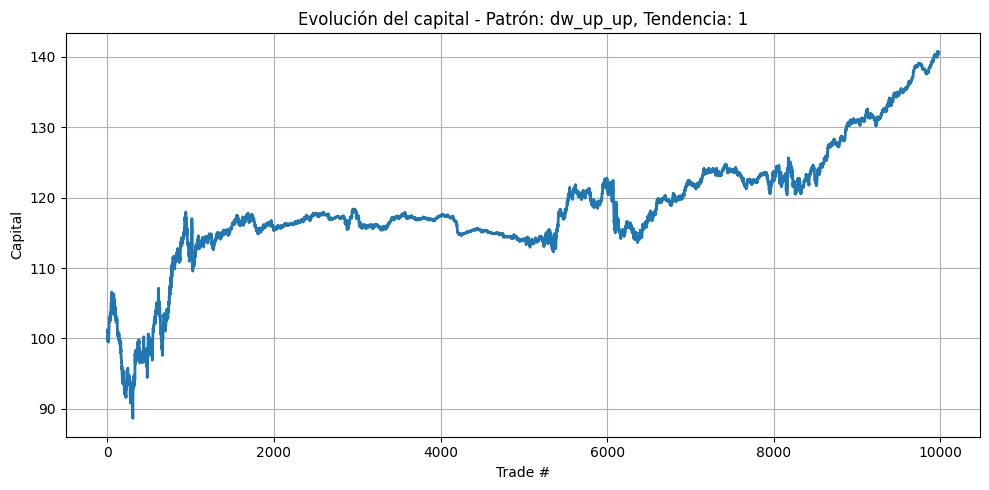

In [25]:

pattern = "dw_up_up" 
tendency = 1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

In [26]:

temporalidad="15m"
initial_year=2022
end_year = 2025
month=7
day=1

symbols = ["ADA", "ATOM", "AVAX", "BNB", "BTC", "DOGE", "DOT", "ETH", "LINK", "LTC", "MATIC", "NEAR", "SHIB", "SOL", "TON", "UNI", "XRP"]

symbol = symbols[3]
df = parse_binance_files(f"../../data/spot/daily/klines/{symbol}USDT/{temporalidad}") #, temporalidad)

# Segundo orden con tendencia
transition_matrix, transition_counts, df_valid = order_n_matrix(df, 
                                                    order=3,
                                                    time_filter=None,
                                                    use_tendency=True)


Matriz de transición (probabilidades):
                       dw      up  binom_p
pattern  tendency                         
dw_dw_dw -1        0.4862  0.5138   0.0013
          1        0.5177  0.4823   0.0443
dw_dw_up -1        0.4919  0.5081   0.1226
          1        0.5317  0.4683   0.0000
dw_up_dw -1        0.5135  0.4865   0.0089
          1        0.5452  0.4548   0.0000
dw_up_up -1        0.5387  0.4613   0.0000
          1        0.5480  0.4520   0.0000
up_dw_dw -1        0.4986  0.5014   0.7822
          1        0.5248  0.4752   0.0001
up_dw_up -1        0.4923  0.5077   0.2814
          1        0.5317  0.4683   0.0000
up_up_dw -1        0.5075  0.4925   0.2583
          1        0.5408  0.4592   0.0000
up_up_up -1        0.5456  0.4544   0.0001
          1        0.5605  0.4395   0.0000

Matriz de transición (ocurrencias):
type                 dw    up
pattern  tendency            
dw_dw_dw -1        6547  6920
          1        1693  1577
dw_dw_up -1        4519  4668


Operaciones totales: 1831
Promedio por día: 2.21
Capital final: 277.94


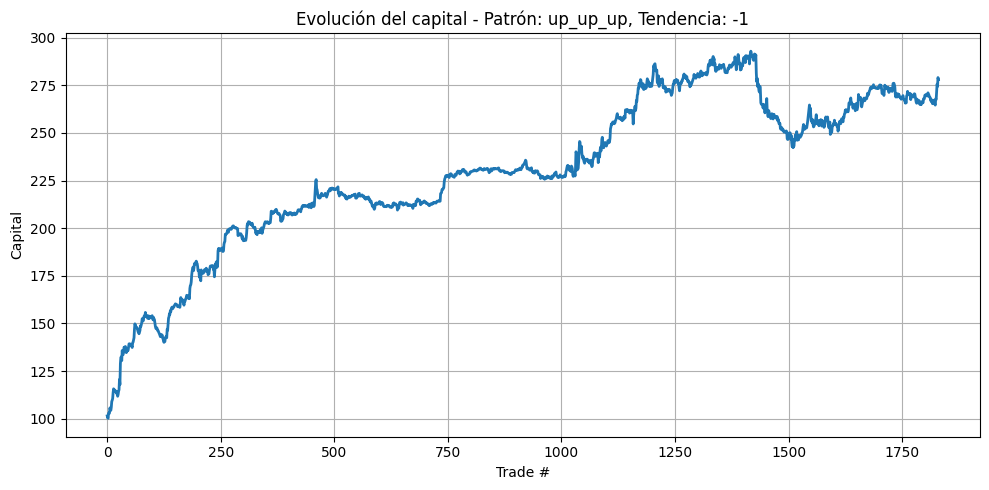

In [27]:

pattern = "up_up_up"
tendency = -1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 4758
Promedio por día: 3.86
Capital final: 187.32


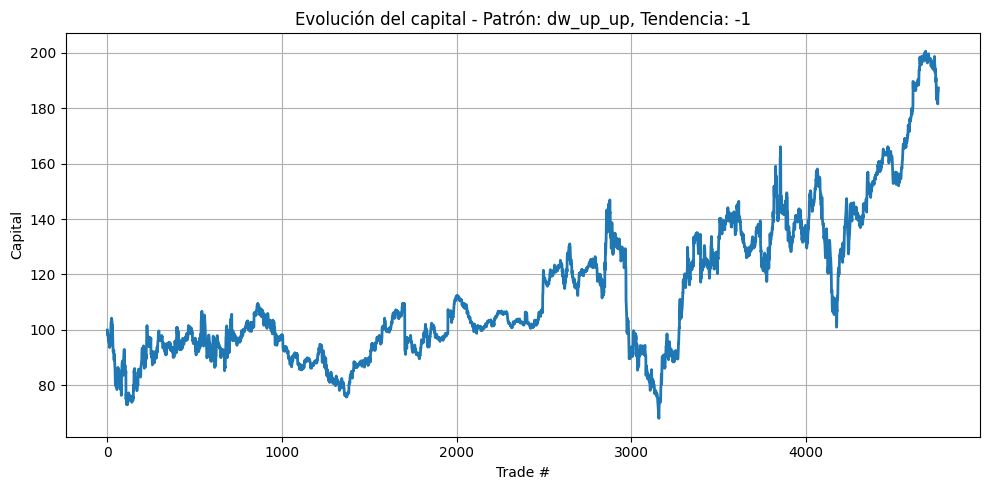

In [28]:

pattern = "dw_up_up" 
tendency = -1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 6847
Promedio por día: 5.43
Capital final: 106.48


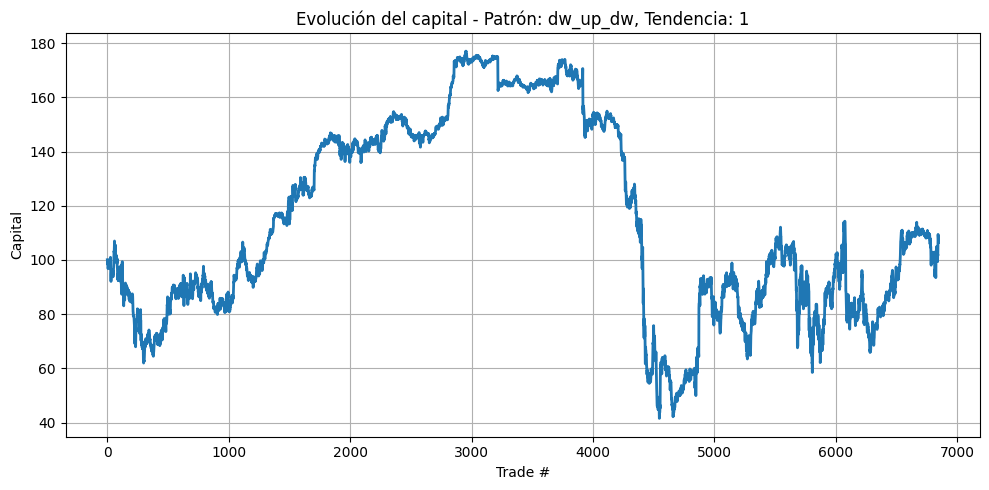

In [29]:

pattern = "dw_up_dw" 
tendency = 1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 10632
Promedio por día: 8.20
Capital final: 361.34


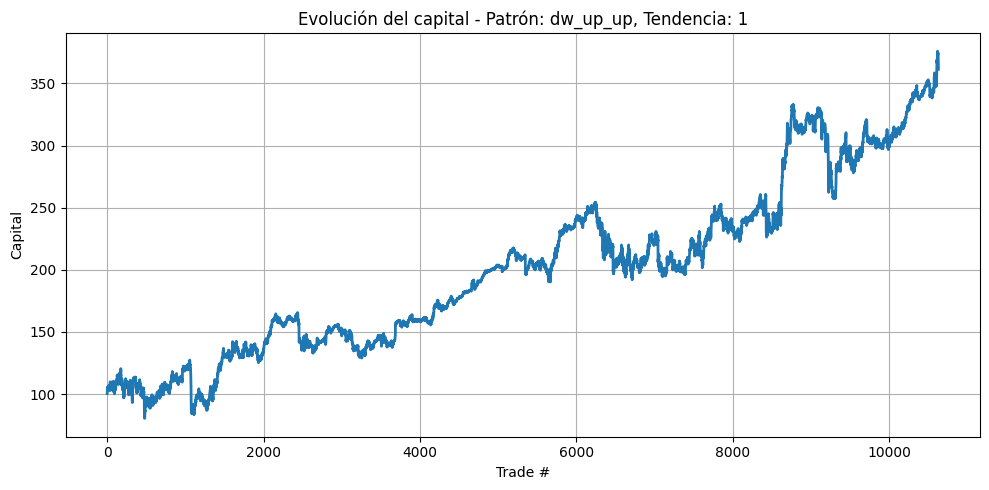

In [30]:

pattern = "dw_up_up" 
tendency = 1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 9980
Promedio por día: 7.71
Capital final: 202.79


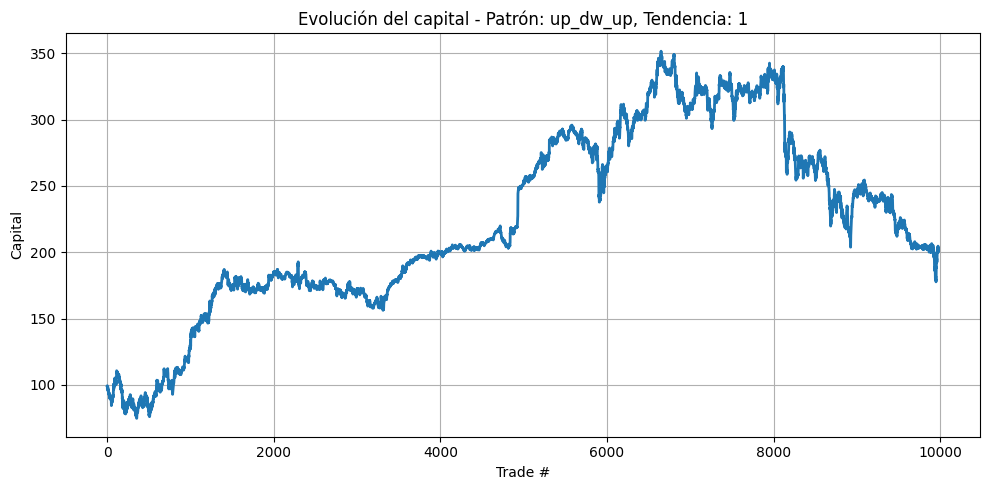

In [31]:

pattern = "up_dw_up" 
tendency = 1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 10710
Promedio por día: 8.35
Capital final: 228.74


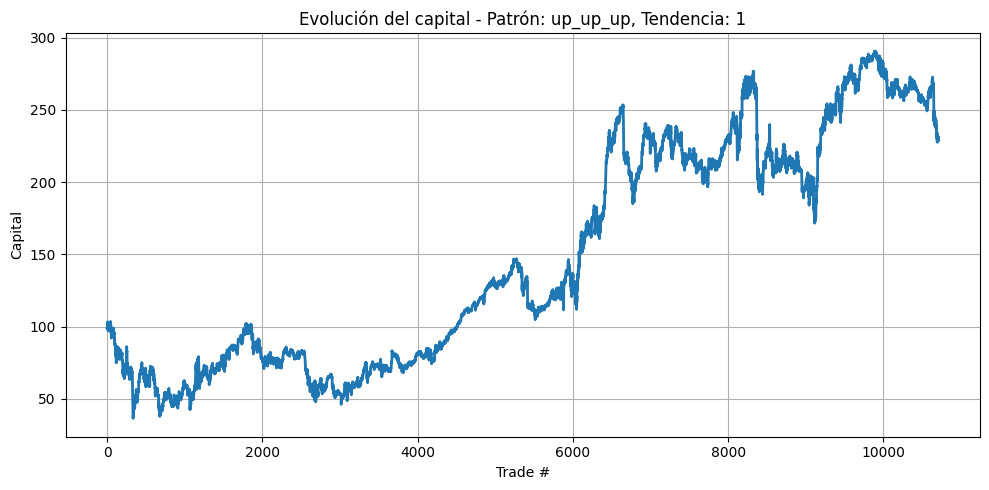

In [32]:

pattern = "up_up_up" 
tendency = 1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 10632
Promedio por día: 8.20
Capital final: 361.34


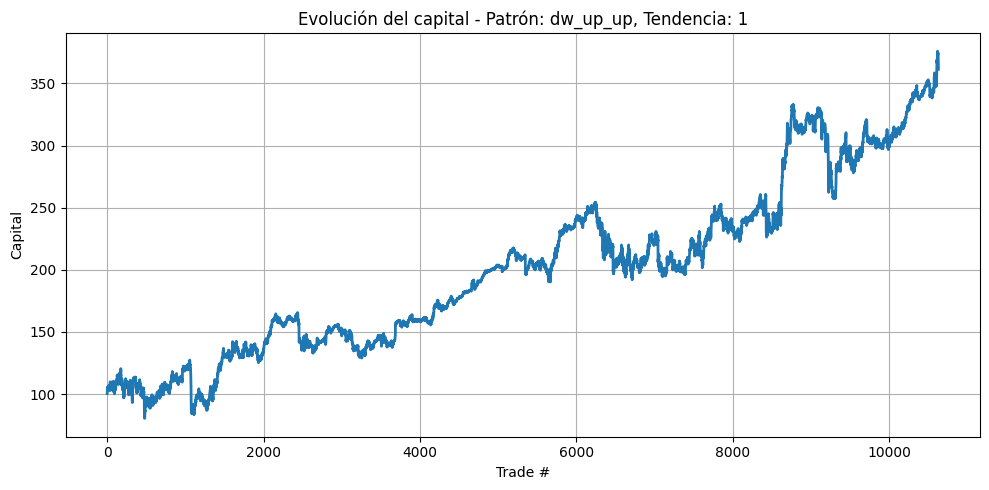

In [33]:

pattern = "dw_up_up" 
tendency = 1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

In [34]:

temporalidad="15m"
initial_year=2022
end_year = 2025
month=7
day=1

symbols = ["ADA", "ATOM", "AVAX", "BNB", "BTC", "DOGE", "DOT", "ETH", "LINK", "LTC", "MATIC", "NEAR", "SHIB", "SOL", "TON", "UNI", "XRP"]

symbol = symbols[5]
df = parse_binance_files(f"../../data/spot/daily/klines/{symbol}USDT/{temporalidad}") #, temporalidad)

# Segundo orden con tendencia
transition_matrix, transition_counts, df_valid = order_n_matrix(df, 
                                                    order=3,
                                                    time_filter=None,
                                                    use_tendency=True)


Matriz de transición (probabilidades):
                       dw      up  binom_p
pattern  tendency                         
dw_dw_dw -1        0.4440  0.5560   0.0000
          1        0.4691  0.5309   0.0017
dw_dw_up -1        0.4681  0.5319   0.0000
          1        0.5217  0.4783   0.0003
dw_up_dw -1        0.4891  0.5109   0.0340
          1        0.5301  0.4699   0.0000
dw_up_up -1        0.5151  0.4849   0.0249
          1        0.5414  0.4586   0.0000
up_dw_dw -1        0.4731  0.5269   0.0000
          1        0.4987  0.5013   0.8461
up_dw_up -1        0.4683  0.5317   0.0000
          1        0.5232  0.4768   0.0000
up_up_dw -1        0.5003  0.4997   0.9704
          1        0.5363  0.4637   0.0000
up_up_up -1        0.5265  0.4735   0.0098
          1        0.5742  0.4258   0.0000

Matriz de transición (ocurrencias):
type                 dw    up
pattern  tendency            
dw_dw_dw -1        5242  6565
          1        1231  1393
dw_dw_up -1        4415  5017


Operaciones totales: 11807
Promedio por día: 9.12
Capital final: 100.35


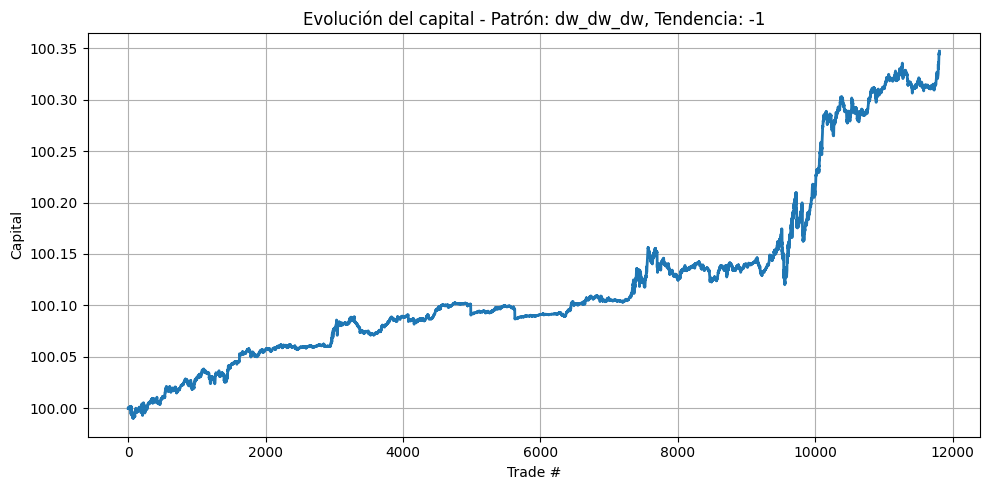

In [35]:

pattern = "dw_dw_dw" 
tendency = -1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 10947
Promedio por día: 8.48
Capital final: 100.27


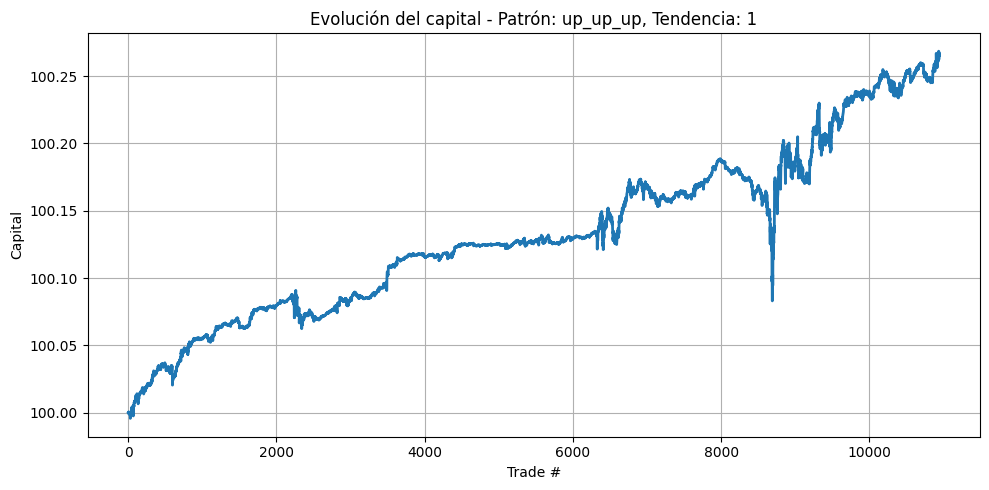

In [36]:

pattern = "up_up_up" 
tendency = 1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 2418
Promedio por día: 2.54
Capital final: 100.01


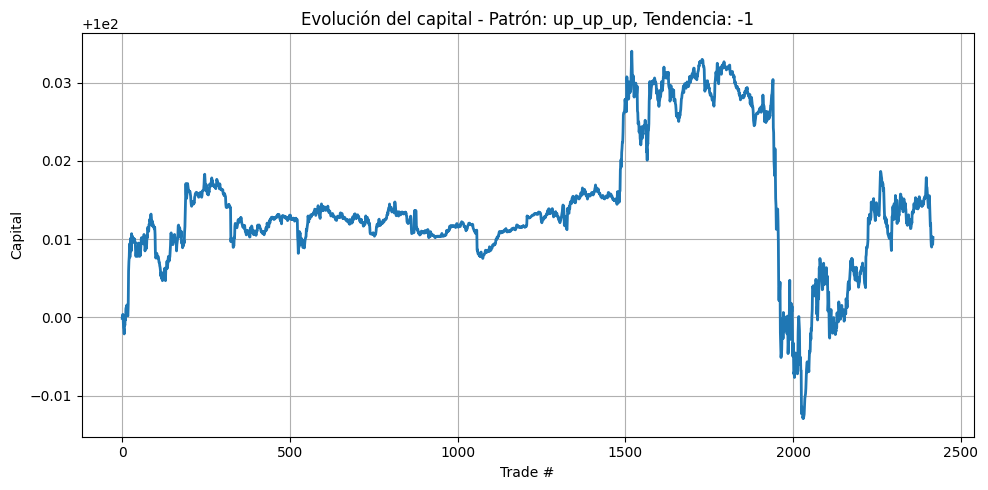

In [37]:

pattern = "up_up_up" 
tendency = -1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 10550
Promedio por día: 8.14
Capital final: 100.14


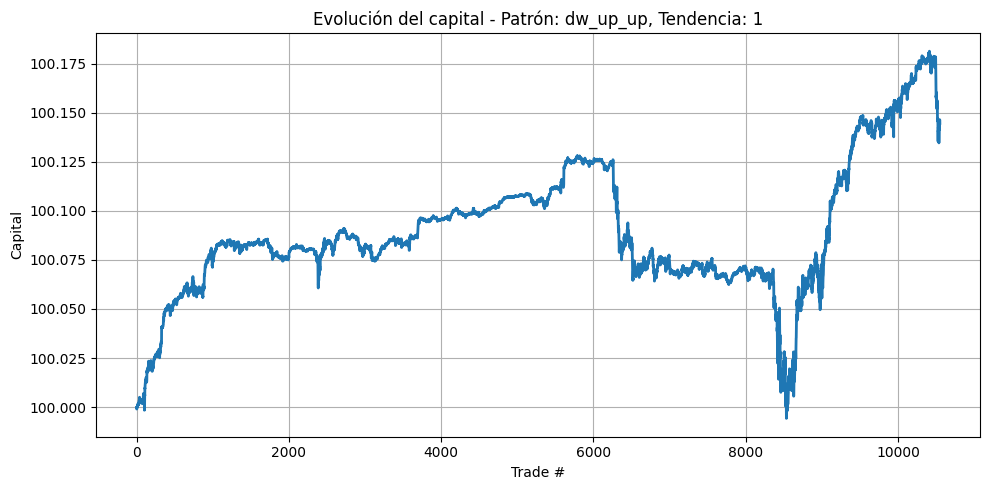

In [38]:

pattern = "dw_up_up" 
tendency = 1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 7066
Promedio por día: 5.52
Capital final: 100.12


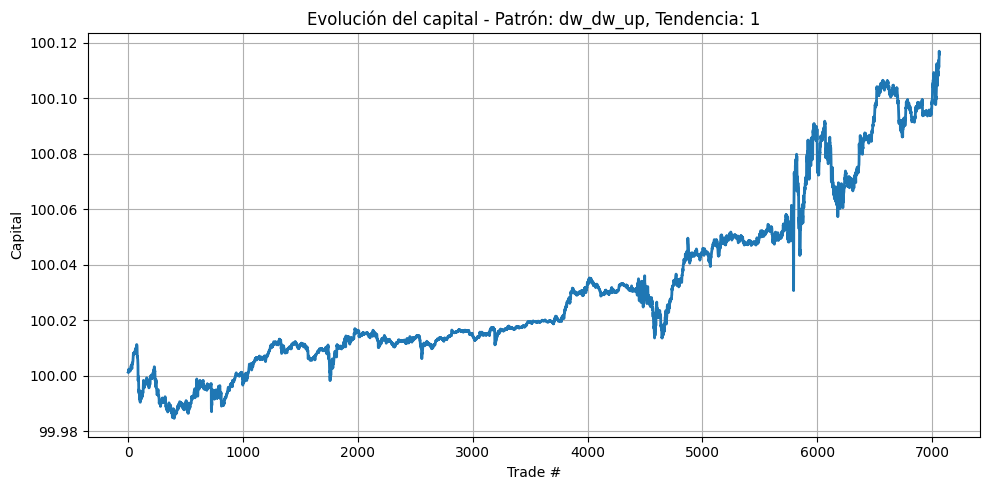

In [39]:

pattern = "dw_dw_up" 
tendency = 1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 9932
Promedio por día: 7.66
Capital final: 100.15


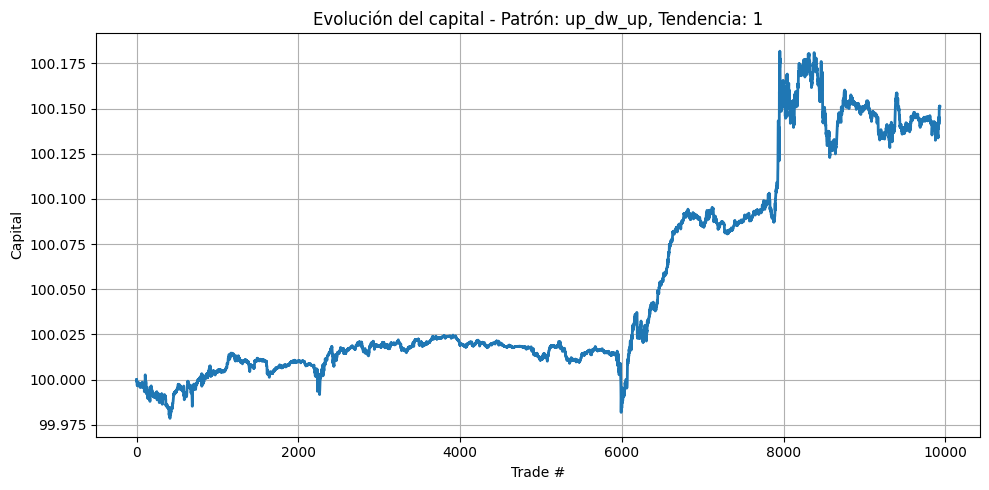

In [40]:

pattern = "up_dw_up" 
tendency = 1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

Operaciones totales: 2624
Promedio por día: 2.62
Capital final: 100.02


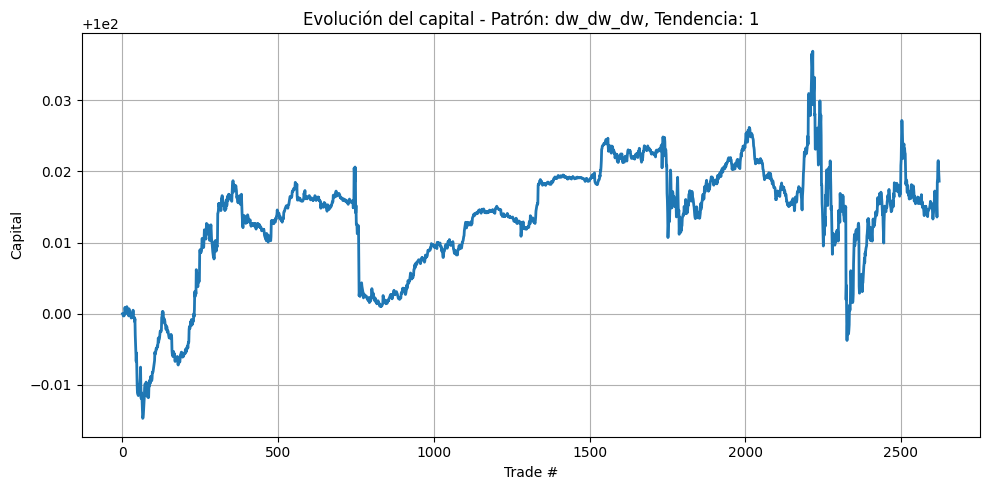

In [42]:

pattern = "dw_dw_dw" 
tendency = 1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)

In [ ]:

temporalidad="15m"
initial_year=2022
end_year = 2025
month=7
day=1

symbols = ["ADA", "ATOM", "AVAX", "BNB", "BTC", "DOGE", "DOT", "ETH", "LINK", "LTC", "MATIC", "NEAR", "SHIB", "SOL", "TON", "UNI", "XRP"]

symbol = symbols[6]
df = parse_binance_files(f"../../data/spot/daily/klines/{symbol}USDT/{temporalidad}") #, temporalidad)

# Segundo orden con tendencia
transition_matrix, transition_counts, df_valid = order_n_matrix(df, 
                                                    order=3,
                                                    time_filter=None,
                                                    use_tendency=True)


In [ ]:

pattern = "dw_dw_dw" 
tendency = 1

output = simulate_continuous_strategy(df, 
                            transition_matrix,
                            pattern,
                            tendency,)